# ANOVA Hypothesis testing with Python

## **Introduction**

As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Load the dataset `Data_All_Included.xlsx` as `data`, and display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab.

In [2]:
# Load the data.

### YOUR CODE HERE ### 

data = pd.read_excel('Data_All_Included.xlsx')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,cluster,n fila,n columna,id,considered,year,NT,UT,TFP,NI,GS,ODM,ND
0,1,4,4,AUSTRIA,0,0.00,0.095299,0.066175,0.127626,0.091135,0.143463,0.716750,0.144396
1,1,4,3,AUSTRIA,0,0.25,0.061642,0.039691,0.087918,0.072284,0.163780,0.665554,0.159959
2,1,5,4,AUSTRIA,0,0.50,0.148464,0.100524,0.232263,0.130430,0.159426,0.638286,0.178293
3,1,5,4,AUSTRIA,0,0.75,0.160181,0.108428,0.292666,0.128248,0.216831,0.807457,0.171086
4,1,5,4,AUSTRIA,0,1.00,0.138307,0.107082,0.212874,0.127778,0.277926,0.803005,0.200834


The features in the data are:
* cluster (From Cluster 0 to 3)
* id (National Open Data initiative)
* year (0.00 = 2017, 0.25 = 2018, 0.50 = 2019, 0.75 = 2020, 1.00 = 2021)
* NT (Number of Tweets), UT (User Tweets), TFP (Tweets from Portal), NI (Number of Interactions), GS (Google Scolar score), ODM (Open Data Maturity Score) and ND (Number of Datasets)


**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

Potential reasons include:

* To understand which variables are present in the data
* To consider the distribution of features
* To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
* To identify issues with the data, such as incorrect or missing values.

## **Step 2: Data exploration** 


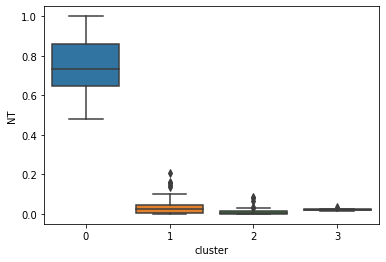

In [3]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "NT", data = data);

## **Step 3: Model building** 

In [4]:
# Define the OLS formula.

ols_formula = 'NT ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NT   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     495.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.63e-69
Time:                        15:28:28   Log-Likelihood:                 190.99
No. Observations:                 130   AIC:                            -374.0
Df Residuals:                     126   BIC:                            -362.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7427      0.018     41.525      0.000       0.707       0.778
C(cluster)[T.1]    -0.7068      0.019    -36.965      0.000      -0.745      -0.669
C(cluster)[T.2]    -0.7305      0.020    -36.940      0.000      -0.770      -0.691
C(cluster)[T.3]    -0.7211      0.031    -23.277      0.000      -0.782      -0.660
==============================================================================
Omnibus:                       34.372   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.854
Skew:                           0.365   Prob(JB):                     2.95e-81
Kurtosis:                      11.242   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

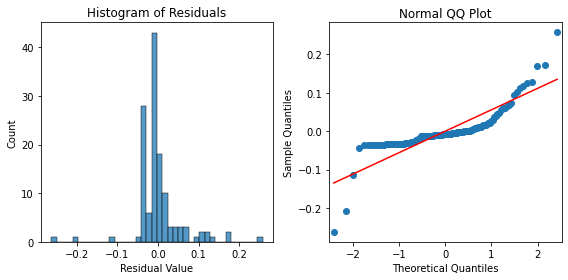

In [5]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

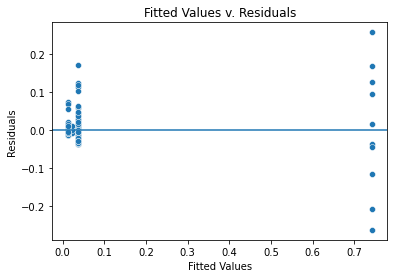

In [6]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [7]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NT   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     495.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.63e-69
Time:                        15:28:28   Log-Likelihood:                 190.99
No. Observations:                 130   AIC:                            -374.0
Df Residuals:                     126   BIC:                            -362.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7427      0.018     41.525      0.000       0.707       0.778
C(cluster)[T.1]    -0.7068      0.019    -36.965      0.000      -0.745      -0.669
C(cluster)[T.2]    -0.7305      0.020    -36.940      0.000      -0.770      -0.691
C(cluster)[T.3]    -0.7211      0.031    -23.277      0.000      -0.782      -0.660
==============================================================================
Omnibus:                       34.372   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.854
Skew:                           0.365   Prob(JB):                     2.95e-81
Kurtosis:                      11.242   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [8]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),4.751165,3.0,495.049354,1.625969e-69
Residual,0.403089,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [9]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["NT"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.7068,0.001,-0.7566,-0.657,True
0,2,-0.7305,0.001,-0.7819,-0.679,True
0,3,-0.7211,0.001,-0.8018,-0.6404,True
1,2,-0.0236,0.132,-0.0518,0.0045,False
1,3,-0.0143,0.9,-0.0825,0.0539,False
2,3,0.0093,0.9,-0.0601,0.0788,False


### Now Repeat the whole experiment with other variables

 

## **Step 2: Data exploration** 


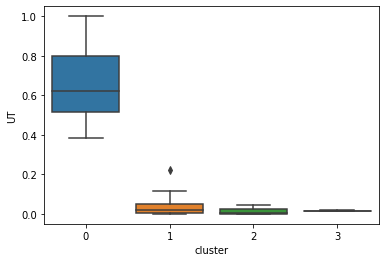

In [10]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "UT", data = data);

## **Step 3: Model building** 

In [11]:
# Define the OLS formula.

ols_formula = 'UT ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UT   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     340.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.35e-60
Time:                        15:28:29   Log-Likelihood:                 182.24
No. Observations:                 130   AIC:                            -356.5
Df Residuals:                     126   BIC:                            -345.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6600      0.019     34.501      0.000       0.622       0.698
C(cluster)[T.1]    -0.6253      0.020    -30.576      0.000      -0.666      -0.585
C(cluster)[T.2]    -0.6482      0.021    -30.646      0.000      -0.690      -0.606
C(cluster)[T.3]    -0.6441      0.033    -19.437      0.000      -0.710      -0.579
==============================================================================
Omnibus:                       63.587   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.804
Skew:                           1.169   Prob(JB):                    4.77e-218
Kurtosis:                      16.390   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

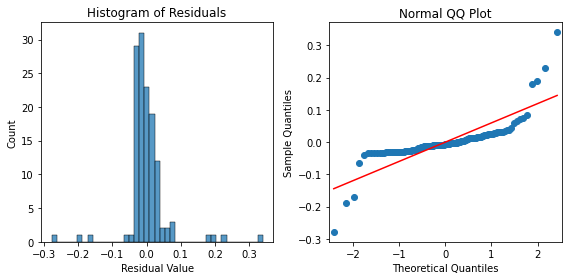

In [12]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

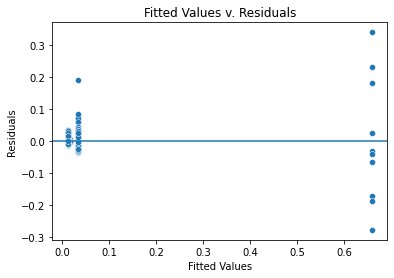

In [13]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [14]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UT   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     340.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.35e-60
Time:                        15:28:29   Log-Likelihood:                 182.24
No. Observations:                 130   AIC:                            -356.5
Df Residuals:                     126   BIC:                            -345.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6600      0.019     34.501      0.000       0.622       0.698
C(cluster)[T.1]    -0.6253      0.020    -30.576      0.000      -0.666      -0.585
C(cluster)[T.2]    -0.6482      0.021    -30.646      0.000      -0.690      -0.606
C(cluster)[T.3]    -0.6441      0.033    -19.437      0.000      -0.710      -0.579
==============================================================================
Omnibus:                       63.587   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.804
Skew:                           1.169   Prob(JB):                    4.77e-218
Kurtosis:                      16.390   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [15]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),3.733086,3.0,339.990286,3.351441e-60
Residual,0.461159,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [16]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["UT"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.6253,0.001,-0.6786,-0.5721,True
0,2,-0.6482,0.001,-0.7032,-0.5931,True
0,3,-0.6441,0.001,-0.7304,-0.5578,True
1,2,-0.0228,0.2027,-0.0529,0.0073,False
1,3,-0.0187,0.9,-0.0917,0.0542,False
2,3,0.0041,0.9,-0.0702,0.0784,False


### Now Repeat the whole experiment with other variables

 

## **Step 2: Data exploration** 


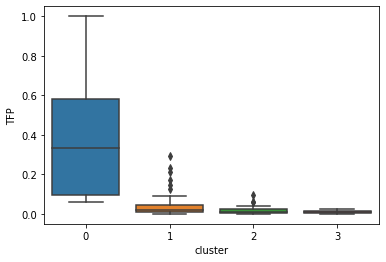

In [17]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "TFP", data = data);

## **Step 3: Model building** 

In [18]:
# Define the OLS formula.

ols_formula = 'TFP ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TFP   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     40.12
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.86e-18
Time:                        15:28:31   Log-Likelihood:                 114.74
No. Observations:                 130   AIC:                            -221.5
Df Residuals:                     126   BIC:                            -210.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3945      0.032     12.269      0.000       0.331       0.458
C(cluster)[T.1]    -0.3541      0.034    -10.300      0.000      -0.422      -0.286
C(cluster)[T.2]    -0.3786      0.036    -10.650      0.000      -0.449      -0.308
C(cluster)[T.3]    -0.3830      0.056     -6.876      0.000      -0.493      -0.273
==============================================================================
Omnibus:                       69.744   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.350
Skew:                           1.410   Prob(JB):                    4.78e-209
Kurtosis:                      16.006   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

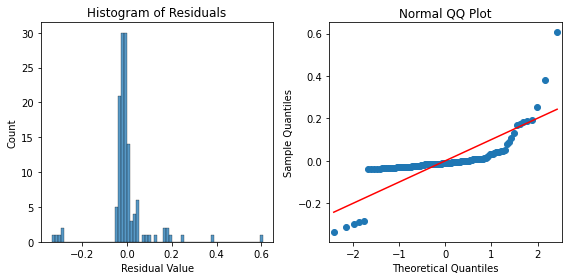

In [19]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

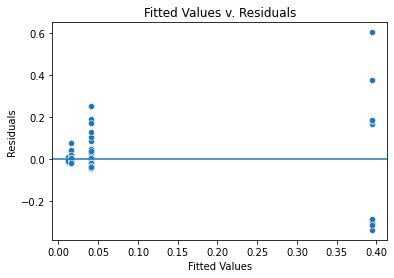

In [20]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [21]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TFP   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     40.12
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.86e-18
Time:                        15:28:31   Log-Likelihood:                 114.74
No. Observations:                 130   AIC:                            -221.5
Df Residuals:                     126   BIC:                            -210.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3945      0.032     12.269      0.000       0.331       0.458
C(cluster)[T.1]    -0.3541      0.034    -10.300      0.000      -0.422      -0.286
C(cluster)[T.2]    -0.3786      0.036    -10.650      0.000      -0.449      -0.308
C(cluster)[T.3]    -0.3830      0.056     -6.876      0.000      -0.493      -0.273
==============================================================================
Omnibus:                       69.744   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.350
Skew:                           1.410   Prob(JB):                    4.78e-209
Kurtosis:                      16.006   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [22]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),1.244493,3.0,40.121066,2.862413e-18
Residual,1.302775,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [23]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["TFP"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.3541,0.001,-0.4436,-0.2646,True
0,2,-0.3786,0.001,-0.4712,-0.286,True
0,3,-0.383,0.001,-0.528,-0.2379,True
1,2,-0.0246,0.5775,-0.0751,0.026,False
1,3,-0.0289,0.9,-0.1515,0.0937,False
2,3,-0.0043,0.9,-0.1292,0.1205,False


### Now Repeat the whole experiment with other variables

 

## **Step 2: Data exploration** 


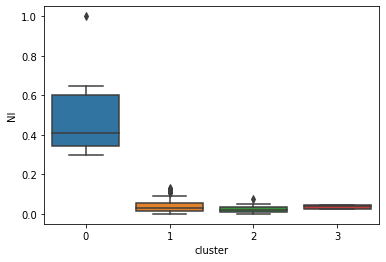

In [24]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "NI", data = data);

## **Step 3: Model building** 

In [25]:
# Define the OLS formula.

ols_formula = 'NI ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NI   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.44e-42
Time:                        15:28:33   Log-Likelihood:                 174.78
No. Observations:                 130   AIC:                            -341.6
Df Residuals:                     126   BIC:                            -330.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4921      0.020     24.290      0.000       0.452       0.532
C(cluster)[T.1]    -0.4523      0.022    -20.883      0.000      -0.495      -0.409
C(cluster)[T.2]    -0.4688      0.022    -20.929      0.000      -0.513      -0.424
C(cluster)[T.3]    -0.4574      0.035    -13.035      0.000      -0.527      -0.388
==============================================================================
Omnibus:                      143.549   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5743.447
Skew:                           3.627   Prob(JB):                         0.00
Kurtosis:                      34.745   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

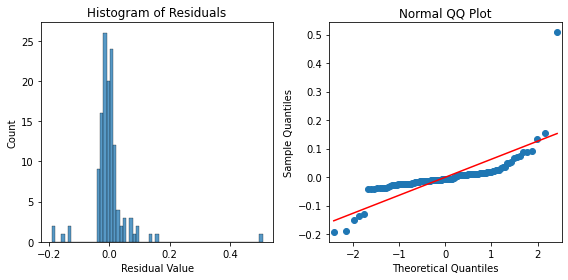

In [26]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

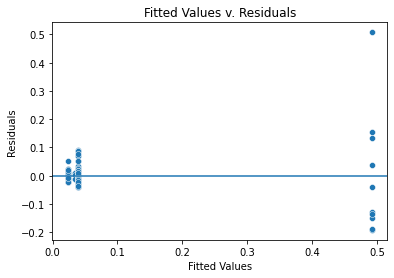

In [27]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [28]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NI   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.44e-42
Time:                        15:28:33   Log-Likelihood:                 174.78
No. Observations:                 130   AIC:                            -341.6
Df Residuals:                     126   BIC:                            -330.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4921      0.020     24.290      0.000       0.452       0.532
C(cluster)[T.1]    -0.4523      0.022    -20.883      0.000      -0.495      -0.409
C(cluster)[T.2]    -0.4688      0.022    -20.929      0.000      -0.513      -0.424
C(cluster)[T.3]    -0.4574      0.035    -13.035      0.000      -0.527      -0.388
==============================================================================
Omnibus:                      143.549   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5743.447
Skew:                           3.627   Prob(JB):                         0.00
Kurtosis:                      34.745   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [29]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),1.949843,3.0,158.32608,1.444591e-42
Residual,0.517245,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [30]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["NI"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.4523,0.001,-0.5087,-0.3959,True
0,2,-0.4688,0.001,-0.5271,-0.4105,True
0,3,-0.4574,0.001,-0.5488,-0.3661,True
1,2,-0.0165,0.532,-0.0483,0.0154,False
1,3,-0.0051,0.9,-0.0823,0.0721,False
2,3,0.0114,0.9,-0.0673,0.09,False


### Now Repeat the whole experiment with other variables

 

## **Step 2: Data exploration** 


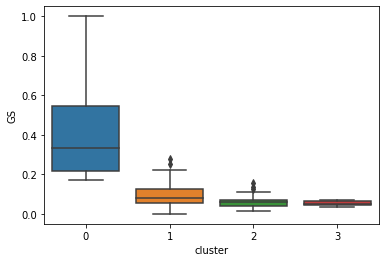

In [31]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "GS", data = data);

## **Step 3: Model building** 

In [32]:
# Define the OLS formula.

ols_formula = 'GS ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GS   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     50.11
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.18e-21
Time:                        15:28:34   Log-Likelihood:                 135.16
No. Observations:                 130   AIC:                            -262.3
Df Residuals:                     126   BIC:                            -250.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4265      0.027     15.520      0.000       0.372       0.481
C(cluster)[T.1]    -0.3290      0.029    -11.197      0.000      -0.387      -0.271
C(cluster)[T.2]    -0.3652      0.030    -12.020      0.000      -0.425      -0.305
C(cluster)[T.3]    -0.3737      0.048     -7.851      0.000      -0.468      -0.279
==============================================================================
Omnibus:                       94.420   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1435.537
Skew:                           2.170   Prob(JB):                         0.00
Kurtosis:                      18.690   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

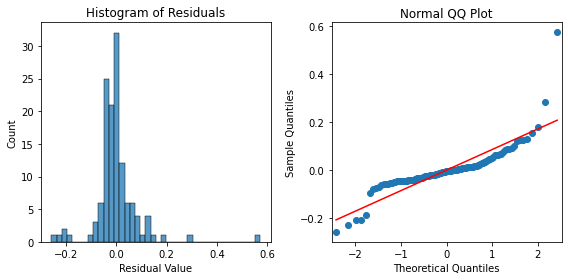

In [33]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

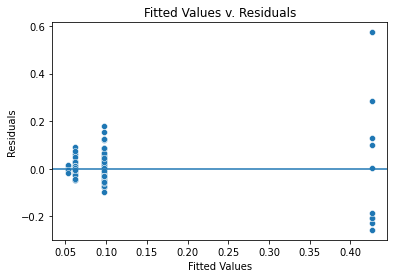

In [34]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [35]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GS   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     50.11
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.18e-21
Time:                        15:28:34   Log-Likelihood:                 135.16
No. Observations:                 130   AIC:                            -262.3
Df Residuals:                     126   BIC:                            -250.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4265      0.027     15.520      0.000       0.372       0.481
C(cluster)[T.1]    -0.3290      0.029    -11.197      0.000      -0.387      -0.271
C(cluster)[T.2]    -0.3652      0.030    -12.020      0.000      -0.425      -0.305
C(cluster)[T.3]    -0.3737      0.048     -7.851      0.000      -0.468      -0.279
==============================================================================
Omnibus:                       94.420   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1435.537
Skew:                           2.170   Prob(JB):                         0.00
Kurtosis:                      18.690   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [36]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),1.135258,3.0,50.108561,2.183358e-21
Residual,0.951550,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [37]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["GS"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.329,0.001,-0.4055,-0.2525,True
0,2,-0.3652,0.001,-0.4443,-0.2861,True
0,3,-0.3737,0.001,-0.4976,-0.2497,True
1,2,-0.0362,0.1341,-0.0794,0.007,False
1,3,-0.0447,0.6624,-0.1495,0.06,False
2,3,-0.0085,0.9,-0.1152,0.0982,False


## **Step 2: Data exploration** 


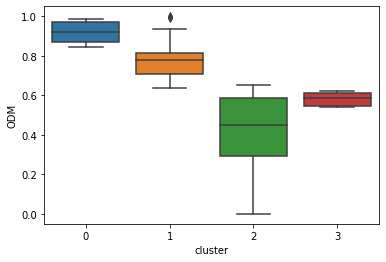

In [38]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "ODM", data = data);

## **Step 3: Model building** 

In [39]:
# Define the OLS formula.

ols_formula = 'ODM ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ODM   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     95.39
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.83e-32
Time:                        15:28:37   Log-Likelihood:                 96.392
No. Observations:                 130   AIC:                            -184.8
Df Residuals:                     126   BIC:                            -173.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9215      0.037     24.888      0.000       0.848       0.995
C(cluster)[T.1]    -0.1485      0.040     -3.753      0.000      -0.227      -0.070
C(cluster)[T.2]    -0.4883      0.041    -11.930      0.000      -0.569      -0.407
C(cluster)[T.3]    -0.3400      0.064     -5.302      0.000      -0.467      -0.213
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.777
Skew:                          -0.456   Prob(JB):                      0.00753
Kurtosis:                       3.986   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

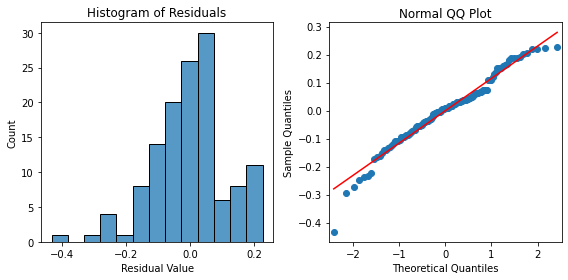

In [40]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

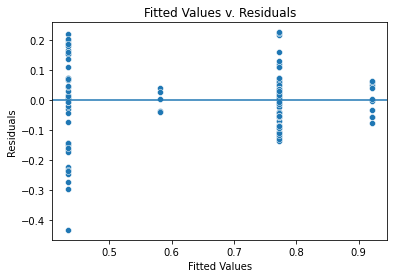

In [41]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [42]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ODM   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     95.39
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.83e-32
Time:                        15:28:37   Log-Likelihood:                 96.392
No. Observations:                 130   AIC:                            -184.8
Df Residuals:                     126   BIC:                            -173.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9215      0.037     24.888      0.000       0.848       0.995
C(cluster)[T.1]    -0.1485      0.040     -3.753      0.000      -0.227      -0.070
C(cluster)[T.2]    -0.4883      0.041    -11.930      0.000      -0.569      -0.407
C(cluster)[T.3]    -0.3400      0.064     -5.302      0.000      -0.467      -0.213
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.777
Skew:                          -0.456   Prob(JB):                      0.00753
Kurtosis:                       3.986   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [43]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),3.923408,3.0,95.385864,2.826899e-32
Residual,1.727542,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [44]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["ODM"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.1485,0.0015,-0.2516,-0.0455,True
0,2,-0.4883,0.001,-0.5949,-0.3818,True
0,3,-0.34,0.001,-0.507,-0.173,True
1,2,-0.3398,0.001,-0.3981,-0.2815,True
1,3,-0.1915,0.0032,-0.3326,-0.0503,True
2,3,0.1483,0.0403,0.0046,0.2921,True


## **Step 2: Data exploration** 


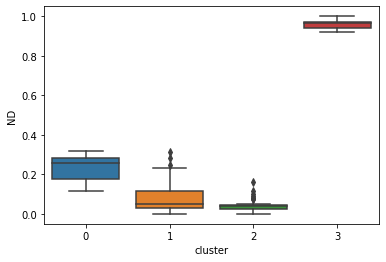

In [45]:
# Create a boxplot with cluster and NT.


sns.boxplot(x = "cluster", y = "ND", data = data);

## **Step 3: Model building** 

In [46]:
# Define the OLS formula.

ols_formula = 'ND ~ C(cluster)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ND   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     377.4
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           9.37e-63
Time:                        15:28:38   Log-Likelihood:                 184.17
No. Observations:                 130   AIC:                            -360.3
Df Residuals:                     126   BIC:                            -348.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2292      0.019     12.159      0.000       0.192       0.267
C(cluster)[T.1]    -0.1494      0.020     -7.413      0.000      -0.189      -0.110
C(cluster)[T.2]    -0.1866      0.021     -8.955      0.000      -0.228      -0.145
C(cluster)[T.3]     0.7309      0.033     22.386      0.000       0.666       0.795
==============================================================================
Omnibus:                       37.418   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.954
Skew:                           1.331   Prob(JB):                     7.86e-15
Kurtosis:                       5.216   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

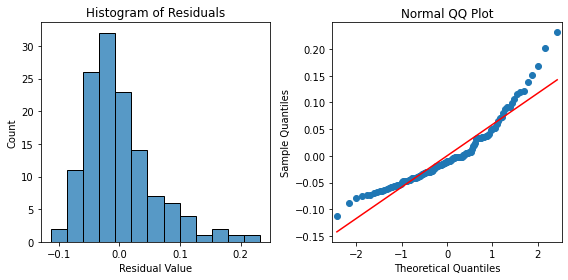

In [47]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

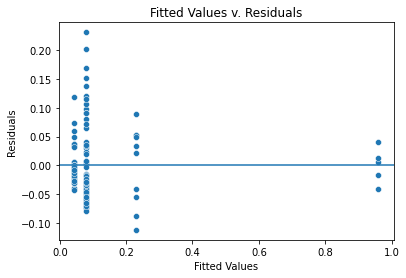

In [48]:
# Create a scatter plot with the fitted values from the model and the residuals.
 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [49]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ND   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     377.4
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           9.37e-63
Time:                        15:28:38   Log-Likelihood:                 184.17
No. Observations:                 130   AIC:                            -360.3
Df Residuals:                     126   BIC:                            -348.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2292      0.019     12.159      0.000       0.192       0.267
C(cluster)[T.1]    -0.1494      0.020     -7.413      0.000      -0.189      -0.110
C(cluster)[T.2]    -0.1866      0.021     -8.955      0.000      -0.228      -0.145
C(cluster)[T.3]     0.7309      0.033     22.386      0.000       0.666       0.795
==============================================================================
Omnibus:                       37.418   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.954
Skew:                           1.331   Prob(JB):                     7.86e-15
Kurtosis:                       5.216   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `clusters`.

In [50]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(cluster),4.022780,3.0,377.395351,9.366518e-63
Residual,0.447692,126.0,NaN,NaN


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests 

In [51]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["ND"], groups = data["cluster"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.1494,0.001,-0.2019,-0.0969,True
0,2,-0.1866,0.001,-0.2409,-0.1324,True
0,3,0.7309,0.001,0.6458,0.8159,True
1,2,-0.0372,0.0075,-0.0669,-0.0076,True
1,3,0.8803,0.001,0.8084,0.9521,True
2,3,0.9175,0.001,0.8443,0.9906,True
